# Lecture 16: The Discrete Fourier Transform

We define the DFT of $N$ samples $f_n$ by

$$
    \hat f_\nu = \frac{1}{N} \sum_{n=0}^{N-1} f_n e^{-2\pi i \frac{n\, \nu}{N}},
$$

and the inverse by
$$
    f_n = \sum_{\nu=0}^{N-1} \hat f_\nu e^{2\pi i \frac{n\, \nu}{N}},
$$

In [1]:
using PyPlot
PyPlot.svg(true);

In [2]:
function DFT(f)
    """ Compute the Discrete Fourier Transform of the vector f
    """
    N = length(f)
    
    fhat = zeros(ComplexF64, N)
    
    for ν=0:N-1
        for n=0:N-1
            fhat[ν+1] += f[n+1]*exp(-2im*π*n*ν/N)/N
        end
    end
    
    return fhat
end

function IDFT(fhat)
    """ Compute the Inverse Discrete Fourier Transform of the vector fhat
    """
    N = length(fhat)
    
    f = zeros(ComplexF64, N)
    
    for n=0:N-1
        for ν=0:N-1
            f[n+1] += fhat[ν+1]*exp(2im*π*n*ν/N)
        end
    end
    
    return f
end

IDFT (generic function with 1 method)

In [23]:
# Test the DFT

f = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

6-element Array{Float64,1}:
 1.0
 2.0
 3.0
 4.0
 5.0
 6.0

In [24]:
fhat = DFT(f)

6-element Array{Complex{Float64},1}:
                 3.5 + 0.0im                   
 -0.5000000000000001 + 0.8660254037844385im    
 -0.4999999999999994 + 0.28867513459481253im   
 -0.4999999999999999 - 2.1437508791444567e-15im
 -0.5000000000000016 - 0.28867513459481353im   
 -0.5000000000000011 - 0.8660254037844407im    

In [25]:
IDFT(fhat)

6-element Array{Complex{Float64},1}:
 0.9999999999999978 - 5.440092820663267e-15im 
  1.999999999999998 + 4.3298697960381105e-15im
 2.9999999999999996 - 2.1094237467877974e-15im
  4.000000000000003 + 2.220446049250313e-15im 
  5.000000000000003 + 6.661338147750939e-16im 
 6.0000000000000036 - 1.3322676295501878e-15im

## The DFT as trigonometric interpolation

We can interpret the IDFT formula by replacing the index $n$ by a continuous variable
$t$. By construction the new function,

$$
f(t) = \sum_{\nu=0}^{N-1} \hat f_\nu e^{2\pi i \frac{\nu}{N} t},
$$

agrees with $f_n$ whenever $t=n$, and interpolates the values in between by
trigonometric functions.

In [26]:
function IDFT_interpolate(fhat, ts)
    """ use the DFT fhat to interpolate the function f at
    time points ts.
    """ 
    N = length(fhat)
    N_ts = length(ts)
    
    f = zeros(ComplexF64, N_ts)
    
    for ν=0:N-1
        f .+= fhat[ν+1].*exp.(2im*π*ν*ts/N)
    end
    
    return f    
end

IDFT_interpolate (generic function with 2 methods)

In [27]:
ts = LinRange(-1, 6, 500)

f_interp = IDFT_interpolate(fhat, ts);

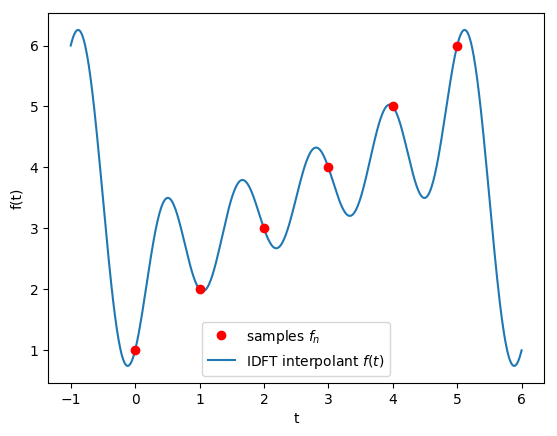

PyObject <matplotlib.legend.Legend object at 0x7f693480f4a8>

In [28]:
figure()

plot(f, "or", label=L"samples $f_n$")
plot(ts, real(f_interp), label=L"IDFT interpolant $f(t)$", zorder=-1)

xlabel("t")
ylabel("f(t)")
legend()

## Phase-freedom for the IDFT

LHS in the IDFT is unchanged if we shift $\nu$ by multiples of $N$:

$$
    f_n = \sum_{\nu=0}^{N-1} \hat f_\nu e^{2\pi i (\nu + k_\nu N) \frac{n}{N}},
$$

because
$$
e^{2\pi i k N \frac{n}{N}} = e^{2\pi i k n} = 1.
$$

But each choice of $k_\nu$ will give a different interpolant when instead of $n$ we
set the continuous $t$!

In [20]:
function IDFT_interpolate(fhat, ts, k)
    """ use the DFT fhat to interpolate the function f at
    time points ts.
    Take a set of integers k that defines the interpolation.
    """ 
    N = length(fhat)
    N_ts = length(ts)
    
    f = zeros(ComplexF64, N_ts)
    
    for ν=0:N-1
        f .+= fhat[ν+1].*exp.(2im*π*(ν + k[ν+1]*N)*ts/N)
    end
    
    return f    
end

IDFT_interpolate (generic function with 2 methods)

In [29]:
ts = LinRange(-1, 6, 500)

# change the phase of the IDFT
ks = [1, -1, 1, -1, 1, -1]

f_interp = IDFT_interpolate(fhat, ts, ks);

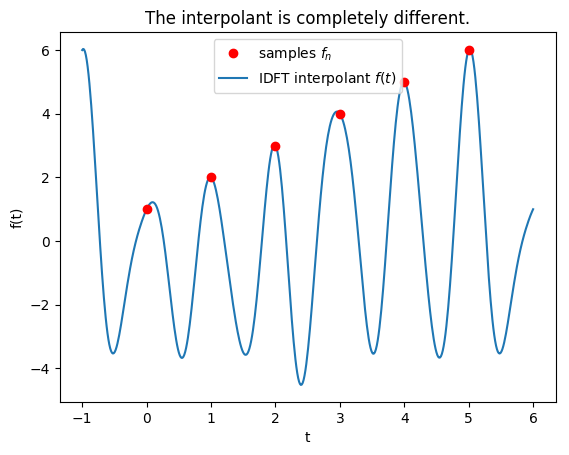

PyObject <matplotlib.legend.Legend object at 0x7f69347c6208>

In [30]:
figure()

plot(f, "or", label=L"samples $f_n$")
plot(ts, real(f_interp), label=L"IDFT interpolant $f(t)$", zorder=-1)

title("The interpolant is completely different.")
xlabel("t")
ylabel("f(t)")
legend()

In [39]:
ts = LinRange(-1, 6, 500)

# Minimum variation interpolant
ks = [0, 0, 0, -1, -1, -1]

f_interp = IDFT_interpolate(fhat, ts, ks);

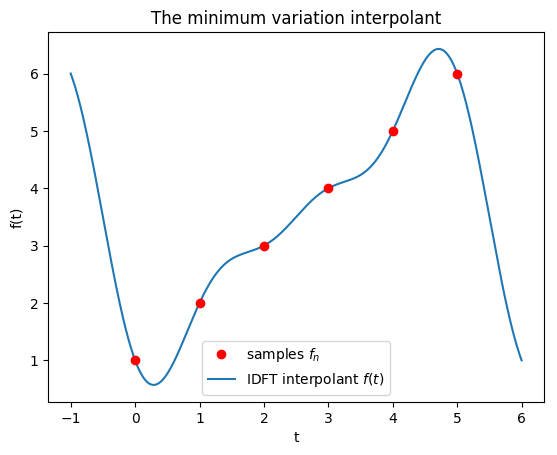

PyObject <matplotlib.legend.Legend object at 0x7f693410fcf8>

In [40]:
figure()

plot(f, "or", label=L"samples $f_n$")
plot(ts, real(f_interp), label=L"IDFT interpolant $f(t)$", zorder=-1)

title("The minimum variation interpolant")
xlabel("t")
ylabel("f(t)")
legend()

# The interpolant is periodic

In [41]:
ts = LinRange(-6, 12, 500)

# Minimum variation interpolant
ks = [0, 0, 0, -1, -1, -1]
f_interp = IDFT_interpolate(fhat, ts, ks);

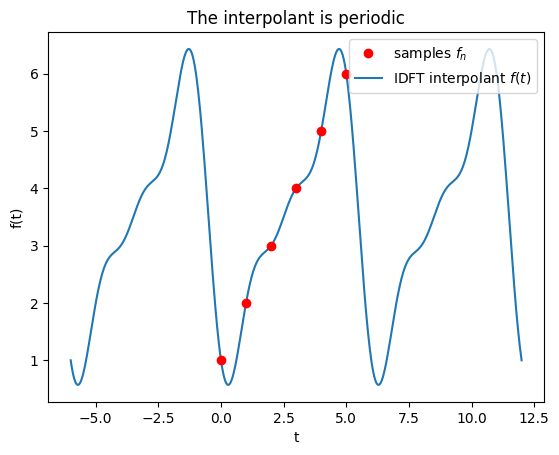

PyObject <matplotlib.legend.Legend object at 0x7f6933da5860>

In [42]:
figure()

plot(f, "or", label=L"samples $f_n$")
plot(ts, real(f_interp), label=L"IDFT interpolant $f(t)$", zorder=-1)

title("The interpolant is periodic")
xlabel("t")
ylabel("f(t)")
legend()

# No Runge phenomenon but a Gibbs phenomenon

Comparing the minimum variation FFT interpolant with a polynomial interpolant we see
that it is better behaved for smooth functions because there is no Runge phenomenon.
However it is worse behaved for functions with discontinuities, where the discrete
equivalent of the Gibbs phenomenon occurs.

In [43]:
using Polynomials

N = 10
t = collect(0:N-1)
f = sin.(exp.(t))

p = polyfit(t, f)

Poly(0.8414709848078965 + 8.441548523617435*x - 22.056456984084797*x^2 + 20.11771229999347*x^3 - 8.624954159093672*x^4 + 1.8824911780450921*x^5 - 0.19692716364582635*x^6 + 0.00534512385954189*x^7 + 0.000586849296880102*x^8 - 3.53622917240221e-5*x^9)

In [45]:
# Evaluate polynomial interpolant
ts = LinRange(0, 9.1, 500)
ys = polyval(p, ts);

In [46]:
# IDFT interpolant
fhat = DFT(f)
ks = [0, 0, 0, 0, 0, -1, -1, -1, -1, -1]
f_interp = IDFT_interpolate(fhat, ts, ks);

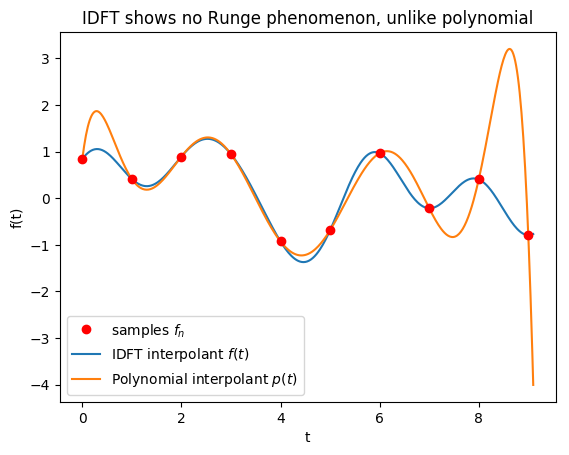

PyObject <matplotlib.legend.Legend object at 0x7f6933ffc898>

In [47]:
figure()

plot(f, "or", label=L"samples $f_n$")
plot(ts, real(f_interp), label=L"IDFT interpolant $f(t)$", zorder=-1)
plot(ts, ys, label=L"Polynomial interpolant $p(t)$", zorder=-1)

title("IDFT shows no Runge phenomenon, unlike polynomial")
xlabel("t")
ylabel("f(t)")
legend()

In [59]:
# But there is a Gibbs phenomenon
N = 150

f = 0:N-1
fhat = DFT(f)

ts = LinRange(-1, N+1, 1000)
ks = vcat(zeros(Int64(N/2)), -ones(Int64(N/2)))
f_interp = IDFT_interpolate(fhat, ts, ks);

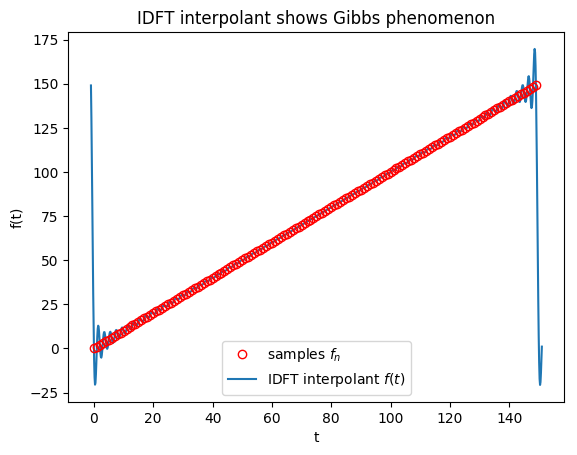

PyObject <matplotlib.legend.Legend object at 0x7f6933cce518>

In [60]:
figure()

plot(f, "or", label=L"samples $f_n$", markerfacecolor="none")
plot(ts, real(f_interp), label=L"IDFT interpolant $f(t)$", zorder=-1)

title("IDFT interpolant shows Gibbs phenomenon")
xlabel("t")
ylabel("f(t)")
legend()